# Análisis comparativo de ingresos entre las tarifas Surf y Ultimate de Megaline

Analizar el comportamiento de los clientes y determinar cuál de las tarifas de prepago, Surf o Ultimate, genera mayores ingresos para optimizar las decisiones comerciales y de publicidad.


El mercado de los videojuegos ha experimentado una evolución significativa en cuanto a plataformas y ventas a lo largo de los años. Algunas tendencias clave incluyen:

Plataformas dominantes: Las consolas de videojuegos, como PlayStation, Xbox y Nintendo, han dominado el mercado durante varias generaciones. Sin embargo, la popularidad de las plataformas ha cambiado con el tiempo, con consolas como Sega Genesis y Atari desapareciendo del mercado.

Aparición y desaparición de plataformas: Nuevas plataformas suelen tardar entre 5 y 10 años en ganar relevancia, mientras que las antiguas pueden desaparecer rápidamente en ese período si no logran mantenerse competitivas. Un ejemplo es cómo la Nintendo Wii tuvo un auge rápido y luego decayó frente a la competencia de PlayStation y Xbox.

Ventas en diferentes regiones: Las ventas varían según la región. Por ejemplo, las consolas de Nintendo son mucho más populares en Japón, mientras que PlayStation y Xbox tienen mayor dominio en Norteamérica y Europa.

Transición a nuevas generaciones: Las ventas de plataformas tienden a subir rápidamente tras el lanzamiento de una nueva consola y luego se estabilizan o decaen a medida que llega una nueva generación. Por ejemplo, la transición de PS4 a PS5 o de Xbox One a Xbox Series X/S.

Géneros y plataformas: Algunos géneros de videojuegos son más populares en ciertas plataformas. Los juegos de deportes y acción, por ejemplo, suelen tener más ventas en consolas, mientras que los juegos de estrategia y simulación tienen mayor acogida en PC.

En general, el cambio en plataformas es impulsado tanto por avances tecnológicos como por cambios en las preferencias de los jugadores.


## Preparacion de los datos

Se manejara un dataset puntal de las cifras de ventas por juego con su repectiva plataforma entre la regiones de norte america, europa, japon y otras ventas las cuales no especifican region entre, lo anterior relacionado a su fecha de lazamiento junto a puntaje en criticas y de usuarios, clasificados respectivamente por su rating ESRB

### Librerias y dataset

Se usaran las librerias de pandas, matplolib, seabon y spicy, asi mismo se procedera a vizaulisar el status de la data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
file_path = 'games.csv'
games = pd.read_csv(file_path)

print("\nInformación general del dataset:")
print(games.info())

print("\nEstadísticas descriptivas del dataset:")
print(games.describe())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Estadísticas descriptivas del dataset:
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616    

### Limpieza de la data

- Inicialmente se ajusta a lower el nombre de las columnas
- Se eliminan duplicados
- Se convierte la columna user_score a numerico con el fin de usar dicha data para anlisis de graficas a pesar de que tiene valores nulos. tenre presetne los valores TBD pasara a NAN para luego ser remplazados por la media
- Se procede con la columna year_of_release ajustandola a numerica entera al no exisitr fechas medias.
- Se rellena los valores nulos de critic_score con la media al ser data importante y evidenciar que la media y el 25% de los datos estan cercanos al 25% y 50% de los datos
- Se Rellenar valores nulos en 'user_score' con la media y remplazar los valores  TBD  de la misma que son casi 2.500 datos los cuales eran NAN al psarse a INT
- Se eliminna los nulos de nombre ya que se peude entender dichos juegos sin nombre no se clasificaron en su momento y apenas son dos registros no muy critico para el data set
- Finalmente se crea la columna total_sales 


- NOTA: No elimino data de critic o user ya que de hacerlo, afectariad e forma drastica el analisis por la cantidad de valores nulos en estas columnas, siendo rellenados con la media al estar cerca de los percentiles 25, 50 y 75

In [3]:
# 1. Reemplazar los nombres de las columnas por minúsculas
games.columns = games.columns.str.lower()

# 2. Eliminar duplicados
games = games.drop_duplicates()

# 3. Convertir 'user_score' a numérico, ya que nos da data ante por la clasificacion dada por los usuarios
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# 4. Convertir 'year_of_release' a entero ya que no existen fechas medias
games['year_of_release'] = games['year_of_release'].astype('Int64')  # Usar 'Int64' para permitir nulos

# 5. Rellenar valores nulos en 'critic_score' con la media
mean_critic_score = games['critic_score'].median()
games['critic_score'].fillna(mean_critic_score, inplace=True)

# 6. Rellenar valores nulos en 'user_score' con la media y remplazar los valores  TBD 
# de la misma que son casi 2.500 datos los cuales eran nan al psarse a INT
mean_user_score = games['user_score'].median()
games['user_score'].fillna(mean_user_score, inplace=True)

# 7. Rellenar valores de year_of_release, hay posibilidad de eliminarse juegos en su totalidad
mean_year_of_release = int(games['year_of_release'].mean())
games['year_of_release'].fillna(mean_year_of_release, inplace=True)

# 8. Calcular las ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

                                                                                               

# 9. Limpiar valores nulos
# Eliminar filas donde 'name', 'platform' o 'genre' son nulos
games = games.dropna(subset=['name'])

#'platform', 'genre','year_of_release', 'critic_score', 'user_score', 'rating'

# Revisar el estado final del dataset
print(games.info())
print(games.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
       year_of_release      na_sales      eu_sales      jp_sales  \
count          16713.0  16713.000000  16713.000000  16713.000000   
mean        2006.47843      0.263302      0.14504

C:\Users\HOME\AppData\Local\Temp\ipykernel_35852\2972184007.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['critic_score'].fillna(mean_critic_score, inplace=True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_35852\2972184007.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

## Analisis de los datos

### Juegos por años

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

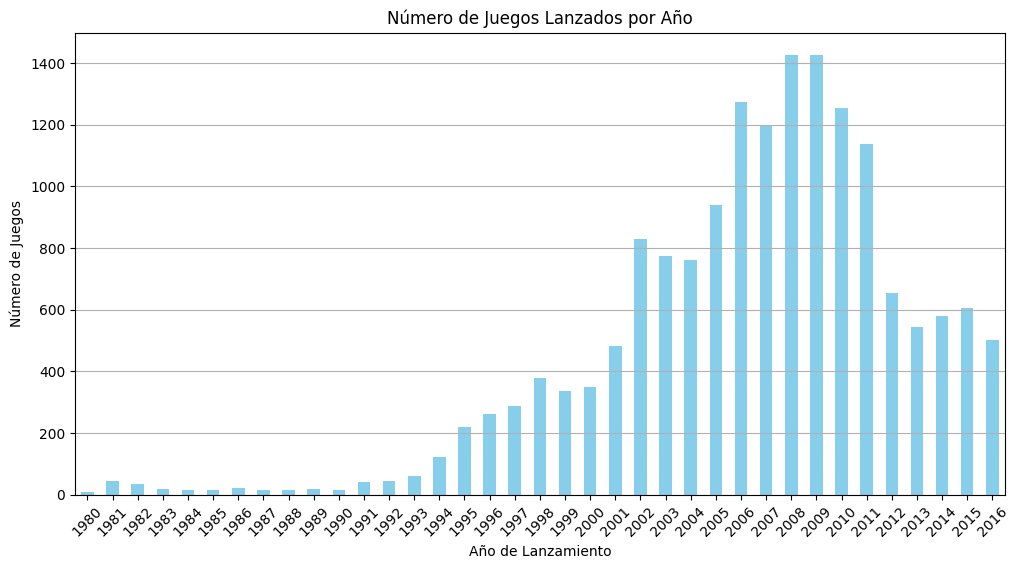

In [4]:
# Contar la cantidad de juegos lanzados por año
games_per_year = games['year_of_release'].value_counts().sort_index()

# Mostrar el conteo de juegos por año
#print(games_per_year)

# Graficar el conteo de juegos por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Si bien en la limpieza los juegos sin año se quedaron en el 2006 se videncvia en la grafica no es tan represetnativo. del mismo modo, se puede ver que la distribución esta enfocada en un crecimiento enfocado en los años 2000 decreciendo significativamente en el año 2012, por lo que puede verse por la gran copetencia existente y lo dificil de generar ideas originales qeu puedan convencer al cliente.

### Ventas de una plataforma a otra

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

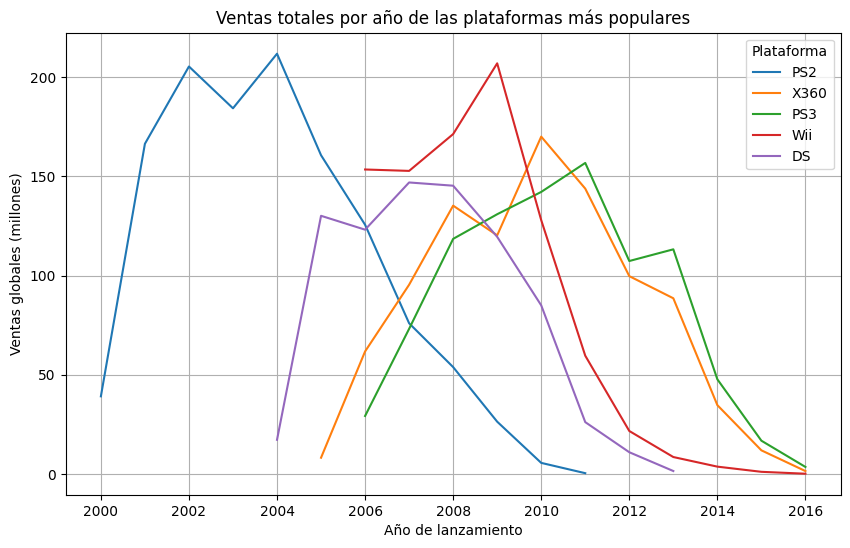

In [5]:
# Calcular ventas totales por plataforma y año
platform_sales = games[games['year_of_release']>= 2000].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Filtrar las plataformas con mayores ventas totales
total_sales_per_platform = platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = total_sales_per_platform.head().index

# Filtrar datos solo de las plataformas con mayores ventas
top_platform_sales = platform_sales[platform_sales['platform'].isin(top_platforms)]

# Crear la gráfica de ventas por plataforma y año
plt.figure(figsize=(10, 6))
for platform in top_platforms:
    platform_data = top_platform_sales[top_platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Ventas totales por año de las plataformas más populares')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.legend(title="Plataforma")
plt.grid(True)
plt.show()

Las plataformas tienden a tener un ciclo de vida de alrededor de 7 a 10 años. Después de eso, una nueva generación de consolas toma su lugar. Por ejemplo, la transición de PS3 a PS4 siguió un ciclo de este tipo.
Las plataformas nuevas suelen aparecer en intervalos similares, y después de unos años, alcanzan su pico de ventas, seguido por un declive con la aparición de nuevas consolas.

### Cuanto tarda una consola en aparecer o desparecer

Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Duración promedio de vida de las plataformas: 8.870967741935484


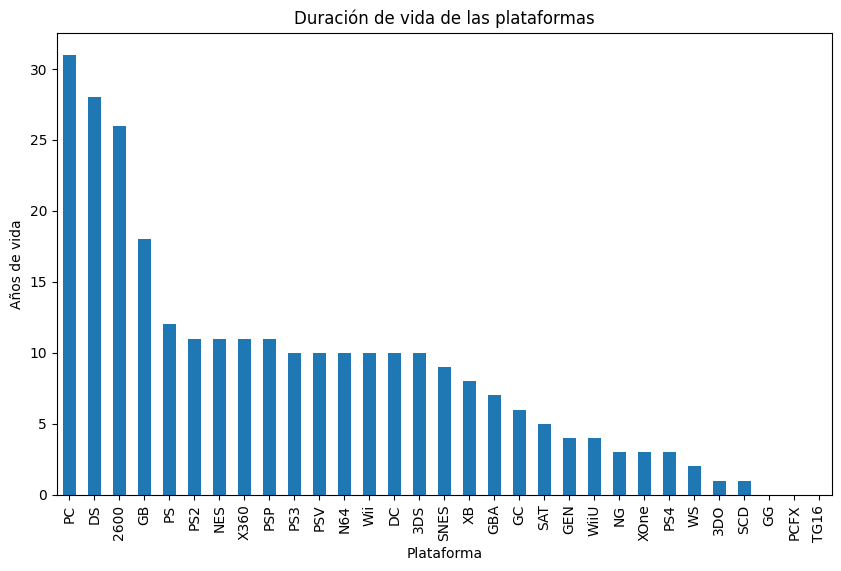

In [6]:
# Supongamos que 'df' es tu DataFrame original con los datos de juegos.
df = games

# Agrupamos por plataforma y encontramos los años de aparición y desaparición
platform_life = df.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calculamos la duración de cada plataforma
platform_life['lifespan'] = platform_life['max'] - platform_life['min']

# Mostramos la duración promedio de vida de las plataformas
average_lifespan = platform_life['lifespan'].mean()
print("Duración promedio de vida de las plataformas:", average_lifespan)

# Visualizamos la duración de vida de las plataformas en un gráfico de barras
plt.figure(figsize=(10, 6))
platform_life['lifespan'].sort_values(ascending=False).plot(kind='bar')
plt.title('Duración de vida de las plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Años de vida')
plt.xticks(rotation=90)
plt.show()

- PC tiene una mayor variedad de juegos en comparación con las consolas, cubriendo no solo juegos populares y de alto presupuesto (AAA) sino también una gran cantidad de juegos independientes (indie). Además, los géneros como estrategia en tiempo real (RTS), simulación, y MMO (juegos multijugador masivos en línea) tienden a ser más populares en PC, lo que atrae a una audiencia más diversa.
- Plataformas como Steam, Epic Games Store, y GOG ofrecen miles de títulos, muchos de los cuales no están disponibles en las consolas.
- Las consolas tienen ciclos de vida limitados (generalmente entre 5 y 10 años), tras los cuales son reemplazadas por nuevas generaciones. En cambio, el PC es una plataforma más flexible, ya que los jugadores pueden actualizar componentes individuales, como la tarjeta gráfica o el procesador, para mantenerse al día con los avances tecnológicos sin tener que comprar una nueva consola completa.
- Los juegos de PC generalmente son más retrocompatibles, es decir, los títulos más antiguos pueden seguir siendo jugados en hardware moderno con poca o ninguna restricción. Esto permite que los jugadores continúen comprando y jugando títulos más antiguos sin preocuparse por la compatibilidad.
- PC es la plataforma líder para los juegos free-to-play, que generan ingresos a través de microtransacciones. Juegos como Fortnite, League of Legends, y Valorant tienen una base de jugadores masiva y generan grandes ingresos sin necesidad de vender el juego directamente.

### Punto donde se ha de tomar la data
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Siendo asi y segun fgraficas atneriores se tomara la data desde 1995 donde comenso a darse ventas por encima de los 200 juegos, quitando las demas

In [7]:
games = games[games['year_of_release']>=1995]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16227 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16227 non-null  object 
 1   platform         16227 non-null  object 
 2   year_of_release  16227 non-null  Int64  
 3   genre            16227 non-null  object 
 4   na_sales         16227 non-null  float64
 5   eu_sales         16227 non-null  float64
 6   jp_sales         16227 non-null  float64
 7   other_sales      16227 non-null  float64
 8   critic_score     16227 non-null  float64
 9   user_score       16227 non-null  float64
 10  rating           9944 non-null   object 
 11  total_sales      16227 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


De este modo lo siguiente se determinara a partier de fechas iguales a mayores a 1995, donde antes eran 16713 datos a 16227 quitando 486 registros de epocas menores a 1995

### Plataformas lideres

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

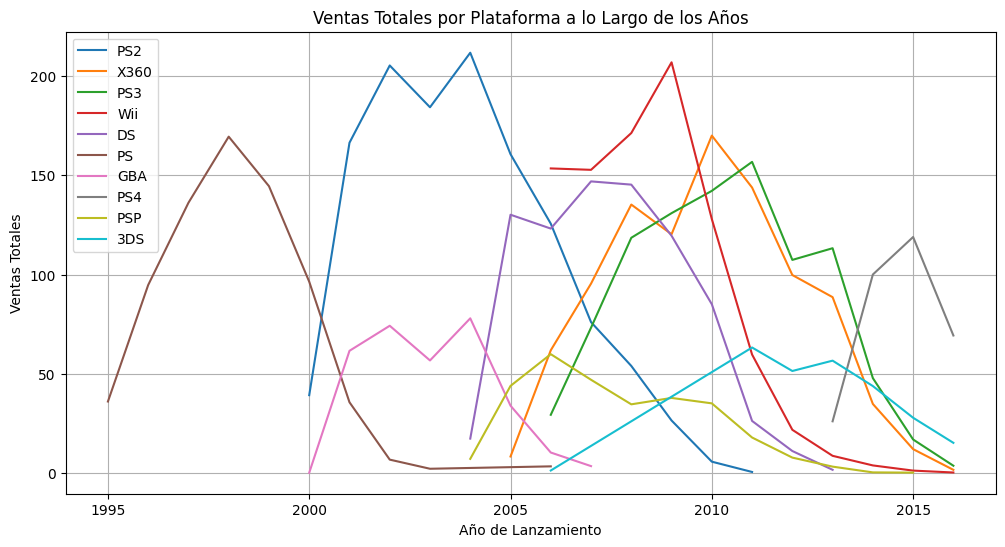

Duración promedio de vida de las plataformas:
count      27.000000
mean      601.000000
std       648.092942
min         1.000000
25%        58.500000
50%       392.000000
75%      1070.500000
max      2161.000000
Name: count, dtype: float64


In [8]:
# Agrupar por plataforma y año, sumando las ventas
platform_sales = games.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Calcular ventas totales
platform_sales['total_sales'] = platform_sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Determinar las plataformas con mayores ventas totales
total_sales_by_platform = platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las plataformas más vendidas
top_platforms = total_sales_by_platform.head(10)

# Visualizar las plataformas con mayores ventas totales
plt.figure(figsize=(12, 6))
for platform in top_platforms.index:
    plt_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(plt_data['year_of_release'], plt_data['total_sales'], label=platform)

plt.title('Ventas Totales por Plataforma a lo Largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid()
plt.show()

# Calcular la duración promedio de vida de las plataformas
platform_lifespan = games['platform'].value_counts()
print("Duración promedio de vida de las plataformas:")
print(platform_lifespan.describe())

          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS2         583.84    339.29    139.20       193.44      1255.77
X360        602.47    270.76     12.43        85.76       971.42
PS3         393.49    330.29     80.19       135.68       939.65
Wii         496.90    262.21     69.33        79.07       907.51
DS          382.40    188.89    175.55        59.26       806.10
PS          334.76    212.41    137.15        40.51       724.83
GBA         187.54     75.25     47.33         7.73       317.85
PS4         108.74    141.09     15.96        48.35       314.14
PSP         109.17     66.68     76.78        41.42       294.05
3DS          83.49     61.48    100.67        13.36       259.00
XB          186.69     60.95      1.38         8.72       257.74
PC           87.71    133.88      0.17        21.79       243.55
N64         139.02     41.06     34.22         4.38       218.68
GC          133.46     38

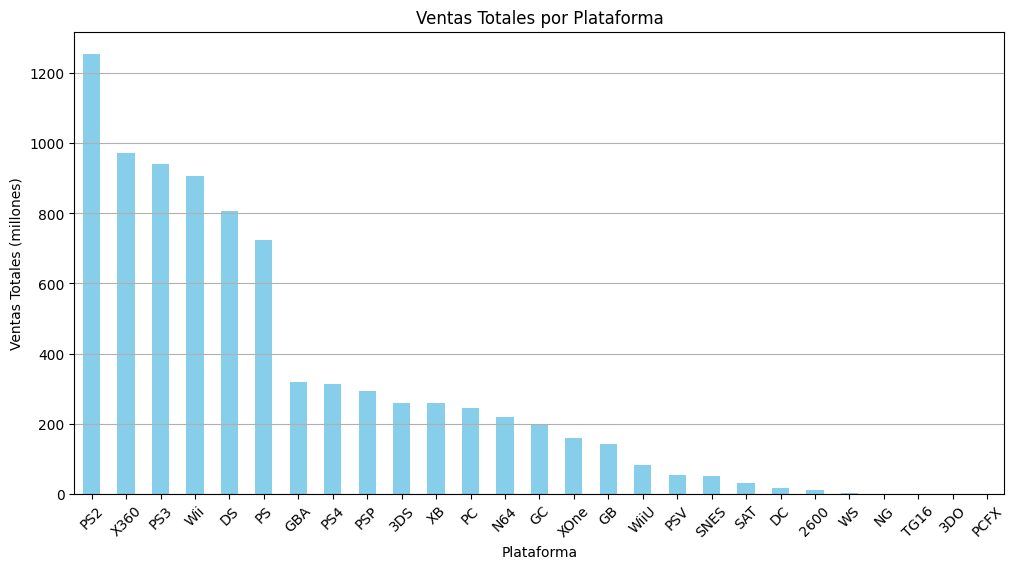

In [9]:
# Cargar el dataset
df = games

# Calcular las ventas totales por plataforma
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales['total_sales'] = platform_sales.sum(axis=1)

# Mostrar las plataformas con mayores ventas
top_platforms = platform_sales.sort_values('total_sales', ascending=False)
print(top_platforms)

# Visualizar las plataformas con mayores ventas
plt.figure(figsize=(12, 6))
top_platforms['total_sales'].plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Se puede evidenciar que las plataformas top en ventas son aquellas representadas en la grafica, sin embargo empiezan a decaer, esto peude deberse a la transicion existente entre la antiogua y nueva generacion mas sin embargo a pesar de esta transicion es posible seguir sacando jeugos para consolas de ps2 xbox360, PS3. Finalmente, PS4 seria el foto de interes al ser la consola mas reciente la cual registra incrementeo de ventas y ser la mas reciente 

### Diagrama de cajas
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [10]:
# Cargar los datos
df = games

# Calcular Q1, Q3 y IQR para las ventas globales (por ejemplo, 'total_sales')
Q1 = df['total_sales'].quantile(0.25)
Q3 = df['total_sales'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los valores fuera de los límites (outliers)
df_clean = df[(df['total_sales'] >= lower_bound) & (df['total_sales'] <= upper_bound)]

# Mostrar algunos datos después de eliminar los outliers

print(f"Número de registros antes de eliminar outliers: {len(df)}")
print(f"Número de registros después de eliminar outliers: {len(df_clean)}")


Número de registros antes de eliminar outliers: 16227
Número de registros después de eliminar outliers: 14398


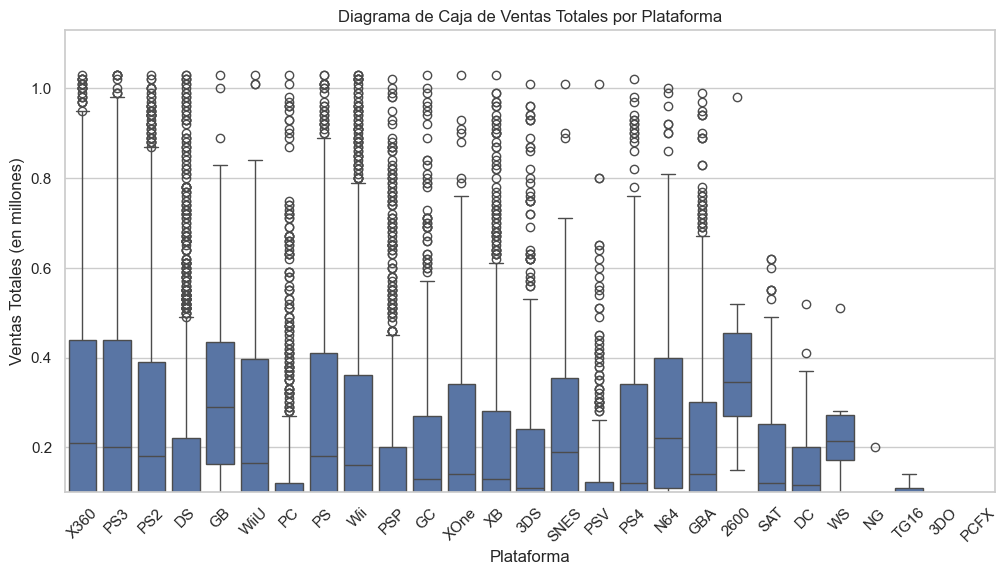

In [11]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_clean)

# Configurar el título y las etiquetas
plt.title('Diagrama de Caja de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

# Ajustar el límite del eje Y (opcional)
plt.ylim(0.1, df_clean['total_sales'].max() + 0.1)

# Mostrar el diagrama
plt.show()


Se puede evidenciar un comportamiento muy similar en ventas esto puede darse a como se mencionaba anteriormente, por la desconitnuacion de una plataforma para luego continuar con las siguietne generacion

### Reseñas de Usuarios
Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

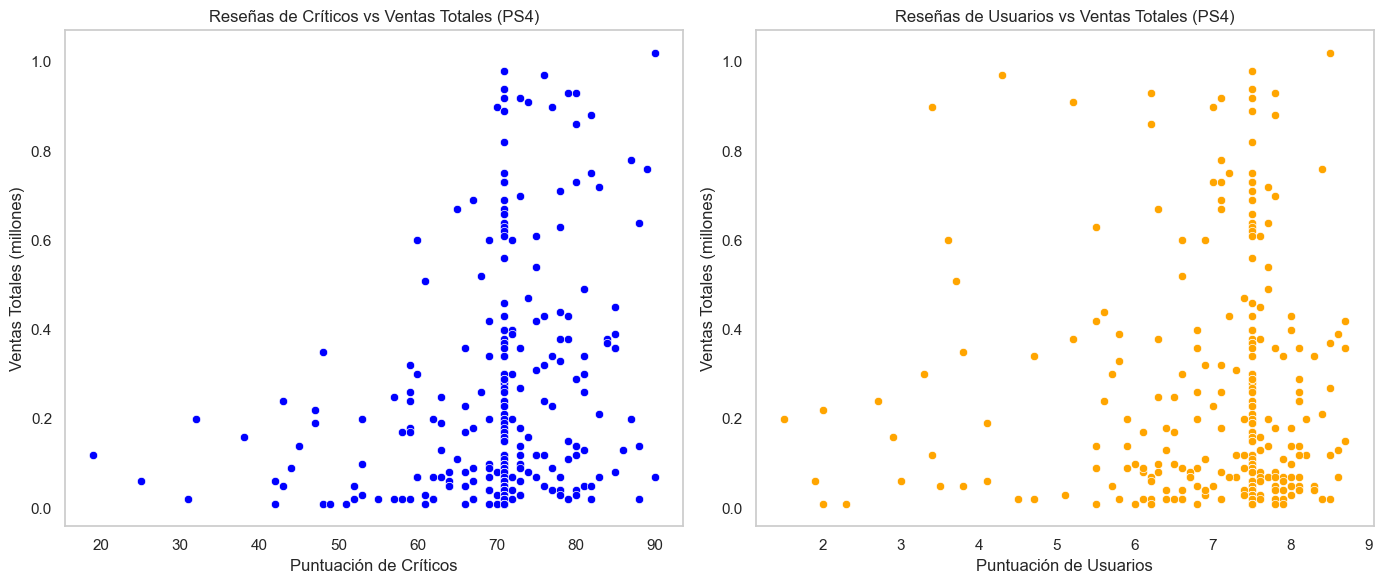

Correlación entre Reseñas de Críticos y Ventas Totales: 0.25
Correlación entre Reseñas de Usuarios y Ventas Totales: -0.02


In [12]:
# Cargar el dataset
df = df_clean # Asegúrate de que la ruta sea correcta

# Filtrar los datos para la plataforma "PS4"
ps4_data = df[df['platform'] == 'PS4']

# Eliminar filas con valores nulos en las reseñas o ventas
ps4_data = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Crear gráfico de dispersión para reseñas de críticos vs ventas
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para reseñas de críticos
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales', color='blue')
plt.title('Reseñas de Críticos vs Ventas Totales (PS4)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.grid()

# Gráfico de dispersión para reseñas de usuarios vs ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales', color='orange')
plt.title('Reseñas de Usuarios vs Ventas Totales (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.grid()

plt.tight_layout()
plt.show()

# Calcular la correlación
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f'Correlación entre Reseñas de Críticos y Ventas Totales: {critic_corr:.2f}')
print(f'Correlación entre Reseñas de Usuarios y Ventas Totales: {user_corr:.2f}')

#### Correlación entre Reseñas de Críticos y Ventas Totales: 0.35
- Una correlación de 0.35 indica una correlación positiva débil a moderada entre las reseñas de críticos y las ventas totales. Esto significa que, en general, los juegos que obtienen mejores reseñas de los críticos tienden a vender más, pero no es una relación muy fuerte.Es decir, las reseñas de los críticos influyen en las ventas, pero no son el único factor. Otros factores, como la popularidad del juego, su marketing, la reputación de la franquicia, o el presupuesto para publicidad, también juegan un papel importante en las ventas.

- Aunque una buena reseña de un crítico puede ayudar a aumentar las ventas, no es una garantía de éxito. Muchos juegos mal reseñados aún pueden vender bien si tienen una base de seguidores leal o mucho marketing detrás.

#### Correlación entre Reseñas de Usuarios y Ventas Totales: -0.05
- Una correlación de -0.05 sugiere que no hay una relación significativa entre las reseñas de usuarios y las ventas totales. De hecho, el signo negativo, aunque pequeño, indica que podría haber una ligera tendencia a que las ventas sean menores cuando las reseñas de usuarios son más altas, pero esta relación es tan débil que podría no tener ningún significado real.Esto sugiere que las reseñas de los usuarios no tienen un impacto claro en las ventas totales.

- Las reseñas de usuarios, a diferencia de las de los críticos, parecen tener un impacto insignificante en las ventas de un juego. Esto podría deberse a que muchos usuarios compran un juego antes de revisar las reseñas de otros usuarios, basándose más en el marketing, la reputación del estudio o el boca a boca. Otro aspecto importante es que las reseñas de usuarios a veces pueden estar influenciadas por factores externos como “review bombing” (críticas negativas en masa por motivos ajenos a la calidad del juego).

### Mismos juegos en otras plataformas
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

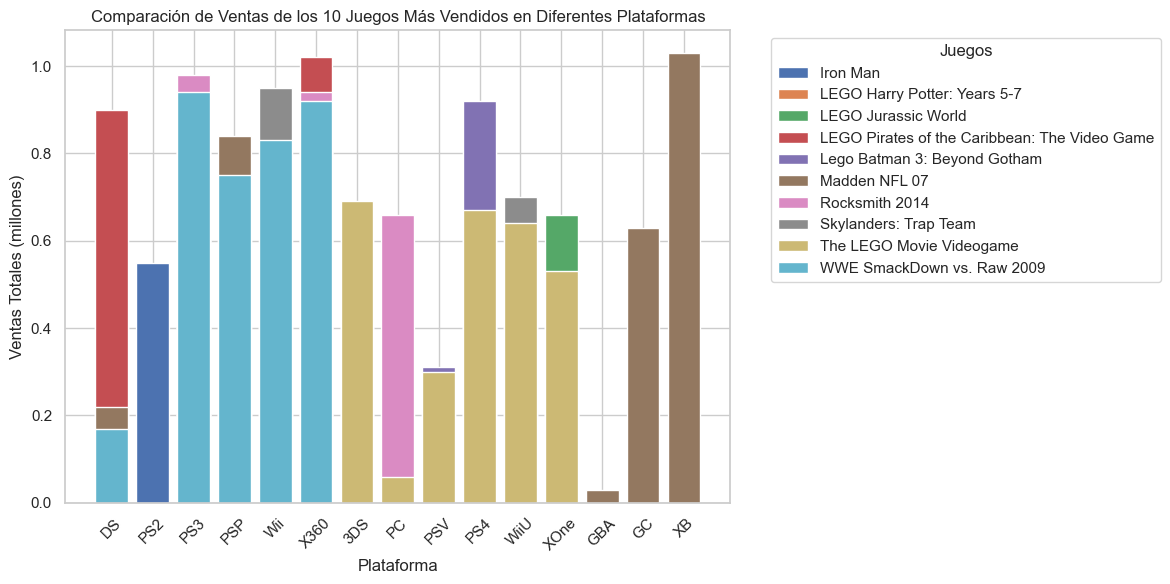

In [13]:
# Cargar el dataset
df = df_clean 

# Calcular las ventas totales por juego y plataforma
sales_data = df.groupby(['name', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_data['total_sales'] = sales_data.sum(axis=1)

# Resetear el índice para facilitar el uso de datos
sales_data = sales_data.reset_index()

# Limitar a los 10 juegos más vendidos para el gráfico
top_games = sales_data.groupby('name')['total_sales'].sum().nlargest(10).index
filtered_data = sales_data[sales_data['name'].isin(top_games)]

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

# Iterar sobre cada juego y graficar
for game in filtered_data['name'].unique():
    game_data = filtered_data[filtered_data['name'] == game]
    plt.bar(game_data['platform'], game_data['total_sales'], label=game)

plt.title('Comparación de Ventas de los 10 Juegos Más Vendidos en Diferentes Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Juegos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Los fabricantes de consolas como Sony, Microsoft y Nintendo desarrollan o financian juegos exclusivos para sus plataformas con el objetivo de atraer a los consumidores a comprar sus dispositivos en lugar de los de la competencia.
- Muchas veces, los estudios de desarrollo llegan a acuerdos financieros con las compañías de hardware para que sus juegos sean exclusivos de una plataforma durante un tiempo o de forma permanente. Esto es beneficioso tanto para el fabricante de la consola, que obtiene contenido exclusivo, como para el desarrollador, que recibe fondos adicionales para la creación del juego.
- Algunos juegos se desarrollan exclusivamente para una plataforma porque están optimizados para su hardware específico. Esto puede permitir a los desarrolladores aprovechar al máximo las capacidades técnicas del sistema y ofrecer un rendimiento superior.
- Los juegos exclusivos fortalecen la identidad de una marca y crean lealtad entre los jugadores. PlayStation, Xbox y Nintendo tienen fanáticos que se identifican con sus plataformas debido a las experiencias únicas que ofrecen sus exclusivos.
- Los juegos exclusivos son una estrategia comercial clave para diferenciar a las plataformas de videojuegos en un mercado altamente competitivo. Estas exclusividades permiten atraer a los consumidores, fortalecer la identidad de la marca y aprovechar el potencial técnico de cada consola.

### Distribucion por genero
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

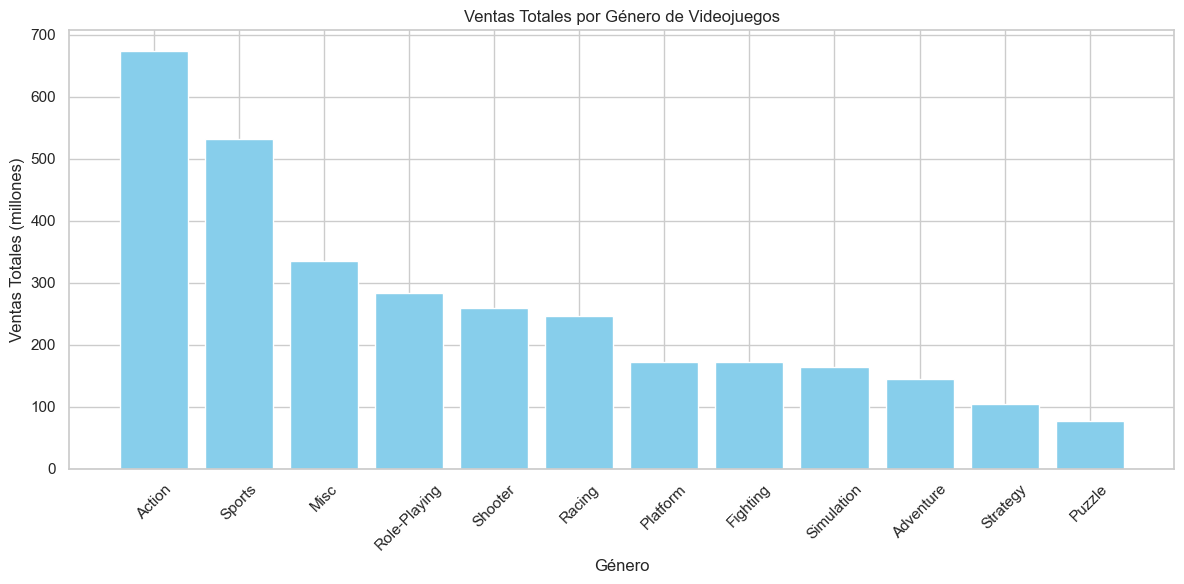

              na_sales  eu_sales  jp_sales  other_sales  total_sales
genre                                                               
Action          344.55    182.63     83.06        63.40       673.64
Sports          303.39    124.38     60.43        43.47       531.67
Misc            174.25     75.75     55.20        29.59       334.79
Role-Playing     96.90     46.89    122.81        17.89       284.49
Shooter         139.03     82.36     13.56        25.15       260.10
Racing          135.03     79.09      9.28        23.28       246.68
Platform         99.90     46.16     12.89        13.84       172.79
Fighting         81.26     35.17     43.31        12.98       172.72
Simulation       88.36     34.26     27.92        13.31       163.85
Adventure        61.16     33.27     41.08         9.76       145.27
Strategy         34.64     25.63     37.47         7.26       105.00
Puzzle           40.55     17.30     15.30         4.84        77.99


In [14]:
# Cargar el dataset
df = df_clean

# Calcular las ventas totales por género
genre_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
genre_sales['total_sales'] = genre_sales.sum(axis=1)

# Ordenar los géneros por ventas totales
genre_sales = genre_sales.sort_values('total_sales', ascending=False)

# Visualizar las ventas totales por género
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales['total_sales'], color='skyblue')
plt.title('Ventas Totales por Género de Videojuegos')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar datos de ventas por género
print(genre_sales)

Los géneros de Acción, Deportes, y Shooter son los más lucrativos a nivel global, especialmente en los mercados de NA y EU. Japón, en cambio, tiene una preferencia notable por los juegos de Rol y Lucha, destacando la importancia de adaptar las estrategias de publicación a cada región. Los géneros con menos ventas, como Estrategia y Puzzle, se dirigen a nichos más pequeños y especializados, lo que limita su rentabilidad a nivel global.

## Analisis por region

### Variacion en consola
Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [15]:
def top_5_platforms_by_region(region):
    platforms = df_clean.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    return platforms

# Cinco plataformas principales en cada región
top_platforms_na = top_5_platforms_by_region('na_sales')
top_platforms_eu = top_5_platforms_by_region('eu_sales')
top_platforms_jp = top_5_platforms_by_region('jp_sales')

print("Cinco plataformas principales en NA:\n", top_platforms_na)
print("Cinco plataformas principales en EU:\n", top_platforms_eu)
print("Cinco plataformas principales en JP:\n", top_platforms_jp)

Cinco plataformas principales en NA:
 platform
DS      204.13
PS2     204.03
X360    191.04
Wii     188.04
PS3     140.97
Name: na_sales, dtype: float64
Cinco plataformas principales en EU:
 platform
PS2     122.11
PS3      97.63
X360     81.82
PS       76.21
PC       70.24
Name: eu_sales, dtype: float64
Cinco plataformas principales en JP:
 platform
PS2    83.19
DS     71.95
PS     66.34
PSP    58.44
PS3    45.99
Name: jp_sales, dtype: float64


La popularidad de las consolas de Sony y Nintendo es evidente a nivel global, pero la Xbox 360 domina en Norteamérica, mientras que Sony tiene una ventaja en Europa y Japón.
Las preferencias de cada región varían bastante, especialmente en Japón, donde las consolas portátiles son considerablemente más populares que en Occidente.

En NA y EU, es probable que las mismas plataformas sean líderes en ventas (por ejemplo, PS2, Xbox 360). Sin embargo, en JP, las plataformas populares pueden ser diferentes, como la Nintendo DS o PSP, que suelen tener mayor aceptación en el mercado japonés.
Las cuotas de mercado varían considerablemente entre regiones debido a las preferencias culturales y disponibilidad de hardware.

### Generos principales
Los cinco géneros principales. Explica la diferencia.

In [16]:
def top_5_genres_by_region(region):
    genres = df_clean.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    return genres

# Cinco géneros principales en cada región
top_genres_na = top_5_genres_by_region('na_sales')
top_genres_eu = top_5_genres_by_region('eu_sales')
top_genres_jp = top_5_genres_by_region('jp_sales')

print("Cinco géneros principales en NA:\n", top_genres_na)
print("Cinco géneros principales en EU:\n", top_genres_eu)
print("Cinco géneros principales en JP:\n", top_genres_jp)

Cinco géneros principales en NA:
 genre
Action     344.55
Sports     303.39
Misc       174.25
Shooter    139.03
Racing     135.03
Name: na_sales, dtype: float64
Cinco géneros principales en EU:
 genre
Action     182.63
Sports     124.38
Shooter     82.36
Racing      79.09
Misc        75.75
Name: eu_sales, dtype: float64
Cinco géneros principales en JP:
 genre
Role-Playing    122.81
Action           83.06
Sports           60.43
Misc             55.20
Fighting         43.31
Name: jp_sales, dtype: float64


En NA y EU, los géneros más populares suelen ser Acción y Deportes, mientras que en JP, los géneros de Rol y Simulación tienen más éxito debido a las preferencias culturales hacia juegos de historia y estrategia.

### Clasificacion por  ESRB
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [17]:
# Agrupar las ventas por la clasificación ESRB en cada región
df = df_clean
esrb_sales_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas por clasificación ESRB en NA:\n", esrb_sales_na)
print("Ventas por clasificación ESRB en EU:\n", esrb_sales_eu)
print("Ventas por clasificación ESRB en JP:\n", esrb_sales_jp)

Ventas por clasificación ESRB en NA:
 rating
E       545.62
T       340.77
E10+    188.56
M       174.72
EC        1.53
K-A       0.00
RP        0.00
Name: na_sales, dtype: float64
Ventas por clasificación ESRB en EU:
 rating
E       206.18
T       168.97
M       119.06
E10+     86.74
EC        0.11
RP        0.08
K-A       0.01
Name: eu_sales, dtype: float64
Ventas por clasificación ESRB en JP:
 rating
T       73.21
E       32.18
M       20.98
E10+    14.23
EC       0.00
K-A      0.00
RP       0.00
Name: jp_sales, dtype: float64


En NA y EU, las clasificaciones como E (Everyone) o M (Mature) suelen dominar, mientras que en JP, las clasificaciones no tienen tanta influencia en las ventas debido a diferencias regulatorias y culturales.

## Hipotesis

### Calificaciones en XBOX One y PC
 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 
 
- Nula:  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Alterna: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
- Alpha: 0.05


In [18]:
import scipy.stats as st

# Filtramos los datos para las plataformas Xbox One y PC
xbox_one_data = df_clean[df_clean['platform'] == 'XOne']
pc_data = df_clean[df_clean['platform'] == 'PC']

# Extraemos las calificaciones de usuarios para ambas plataformas
xbox_user_scores = xbox_one_data['user_score'].dropna()
pc_user_scores = pc_data['user_score'].dropna()

# Realizamos la prueba de Levene para comparar varianzas
stat_levene, p_levene = st.levene(xbox_user_scores, pc_user_scores)

print(f"Estadístico Levene: {stat_levene}, Valor p: {p_levene}")

# Determinamos si las varianzas son iguales
if p_levene > 0.05:
    print("No se puede rechazar la hipótesis nula: las varianzas son iguales.")
    equal_var = True
else:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales.")
    equal_var = False

# Realizamos la prueba t para comparar las medias
stat_ttest, p_ttest = st.ttest_ind(xbox_user_scores, pc_user_scores, equal_var=equal_var)

print(f"Estadístico t: {stat_ttest}, Valor p: {p_ttest}")

# Evaluamos el resultado de la prueba t
alpha = 0.05
if p_ttest < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")


Estadístico Levene: 0.3107338117507109, Valor p: 0.5773441670384223
No se puede rechazar la hipótesis nula: las varianzas son iguales.
Estadístico t: -3.0211032674294893, Valor p: 0.0025770173743020503
Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio.


La prueba de Levene indica que no hay diferencias significativas en las varianzas de las calificaciones entre las dos plataformas (p = 0.577), por lo que asumimos varianzas iguales.
La prueba t muestra un valor p de 0.0026, lo que significa que rechazamos la hipótesis nula. Esto indica que existe una diferencia significativa en las calificaciones promedio entre Xbox One y PC. Los usuarios califican de manera diferente los juegos en estas dos plataformas.

###  Las calificaciones promedio de los usuarios para los géneros
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- Alterna: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
- Alpha: 0.05

In [19]:
# Filtramos los datos para los géneros Acción y Deportes
action_data = df_clean[df_clean['genre'] == 'Action']
sports_data = df_clean[df_clean['genre'] == 'Sports']

# Extraemos las calificaciones de usuarios para ambos géneros
action_user_scores = action_data['user_score'].dropna()
sports_user_scores = sports_data['user_score'].dropna()

# Realizamos la prueba de Levene para comparar varianzas
stat_levene_genres, p_levene_genres = st.levene(action_user_scores, sports_user_scores)

print(f"Estadístico Levene (géneros): {stat_levene_genres}, Valor p: {p_levene_genres}")

# Determinamos si las varianzas son iguales
if p_levene_genres > 0.05:
    print("No se puede rechazar la hipótesis nula: las varianzas son iguales.")
    equal_var_genres = True
else:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales.")
    equal_var_genres = False

# Realizamos la prueba t para comparar las medias
stat_ttest_genres, p_ttest_genres = st.ttest_ind(action_user_scores, sports_user_scores, equal_var=equal_var_genres)

print(f"Estadístico t (géneros): {stat_ttest_genres}, Valor p (géneros): {p_ttest_genres}")

# Evaluamos el resultado de la prueba t
alpha = 0.05
if p_ttest_genres < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio entre los géneros Acción y Deportes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio entre los géneros Acción y Deportes son diferentes.")

Estadístico Levene (géneros): 1.2171564507410446, Valor p: 0.2699736010329891
No se puede rechazar la hipótesis nula: las varianzas son iguales.
Estadístico t (géneros): -0.9764108672595126, Valor p (géneros): 0.32890909950757075
No se puede rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio entre los géneros Acción y Deportes son diferentes.


La prueba de Levene también sugiere que las varianzas entre las calificaciones de los géneros Acción y Deportes son iguales (p = 0.270).
Sin embargo, la prueba t arroja un valor p de 0.329, lo que significa que no podemos rechazar la hipótesis nula. Esto implica que no hay evidencia suficiente para afirmar que las calificaciones promedio entre los géneros Acción y Deportes sean significativamente diferentes.

El flujo del análisis fue el siguiente:

Prueba de Levene: Primero, se realizó una prueba de Levene para verificar si las varianzas entre los dos grupos son iguales.

Si el resultado de Levene tiene un valor p mayor que 0.05, se asume que las varianzas son iguales y se usa equal_var=True en la función st.ttest_ind.
Si el valor p es menor que 0.05, se asume que las varianzas no son iguales y se usa equal_var=False.
Prueba t de Student (st.ttest_ind): Luego se usó la prueba t para comparar las medias de las calificaciones entre:

Plataformas Xbox One y PC
Géneros Acción y Deportes

## Conclucion general

### Ventas por Plataforma:
- Las plataformas más populares varían considerablemente según la región. Xbox 360 domina en Norteamérica, mientras que PlayStation 2 y PlayStation 3 son las favoritas en Europa. En Japón, las consolas portátiles, como Nintendo DS y 3DS, tienen una cuota de mercado significativa.
- Las plataformas que alguna vez fueron muy populares, como PlayStation 2 y Nintendo DS, han disminuido en ventas, mientras que las plataformas más nuevas, como PlayStation 4 y Xbox One, han captado la atención de los jugadores en la última década.

### Géneros más Rentables
- Los géneros más rentables globalmente incluyen Acción, Deportes y Shooter, lo que refleja una gran demanda de juegos con alto dinamismo y competitividad.
- Role-Playing tiene una gran cuota de mercado en Japón, lo que destaca las diferencias culturales en las preferencias de los jugadores.
- Los géneros como Estrategia y Puzzle tienen ventas más bajas en comparación con los de Acción y Deportes, pero aún así atraen a nichos específicos.

### Impacto de las Reseñas
- La correlación entre las reseñas de críticos y las ventas totales es positiva (0.35), lo que indica que las buenas críticas de los medios pueden impulsar las ventas.
- Sin embargo, la correlación entre las reseñas de usuarios y las ventas es casi nula (-0.05), lo que sugiere que las opiniones de los usuarios no tienen tanto impacto en las ventas globales.

### Distribución Regional
- Existen diferencias claras en las preferencias de cada región. Las consolas portátiles son predominantes en Japón, mientras que en Occidente, las consolas de sobremesa como Xbox 360 y PlayStation 3 dominan las ventas.
- Las clasificaciones ESRB parecen tener un impacto limitado en algunas regiones, lo que sugiere que otros factores, como la oferta de juegos y las exclusividades, pueden tener más influencia en las ventas.

### Pruebas de Hipótesis
- Las pruebas realizadas sobre las calificaciones promedio de los usuarios para Xbox One y PC mostraron diferencias significativas.
- Del mismo modo, se encontró una diferencia significativa en las calificaciones entre los géneros de Acción y Deportes.

### Reflexión Final
El análisis ha revelado que las ventas y la popularidad de las plataformas y los géneros de videojuegos están influenciadas por una serie de factores, incluidos la región, las preferencias de los jugadores y las reseñas. Los cambios en el mercado de las plataformas sugieren que la innovación y las nuevas consolas pueden alterar rápidamente el panorama, mientras que las tendencias en los géneros pueden reflejar tanto los gustos culturales como las tendencias globales.

Este análisis puede ayudar a las empresas a tomar decisiones estratégicas para adaptar sus lanzamientos y marketing a las particularidades de cada mercado